# Principal Component Analysis (PCA)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns

## Importing the dataset

In [5]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
np.where(df == " ")

C:\Users\aditi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(array([], dtype=int64), array([], dtype=int64))

In [12]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

Feature Alcohol


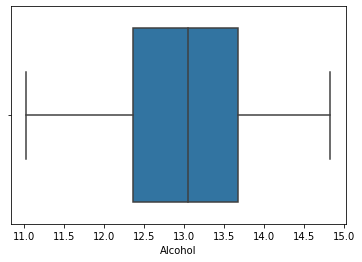

*****************************************************************************************************************************
Feature Malic_Acid


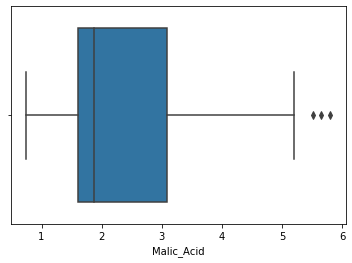

*****************************************************************************************************************************
Feature Ash


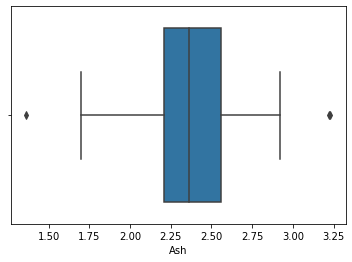

*****************************************************************************************************************************
Feature Ash_Alcanity


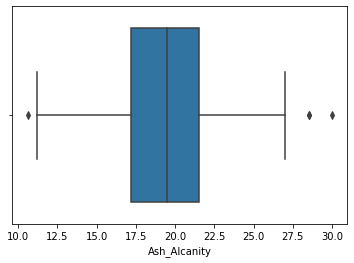

*****************************************************************************************************************************
Feature Magnesium


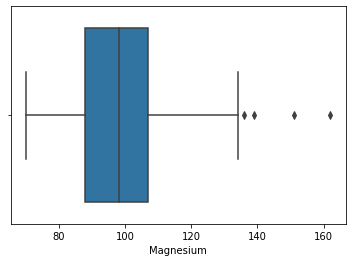

*****************************************************************************************************************************
Feature Total_Phenols


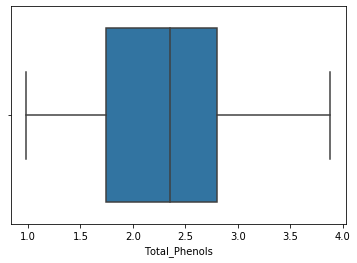

*****************************************************************************************************************************
Feature Flavanoids


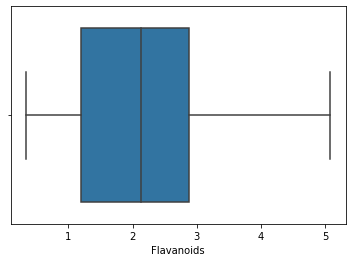

*****************************************************************************************************************************
Feature Nonflavanoid_Phenols


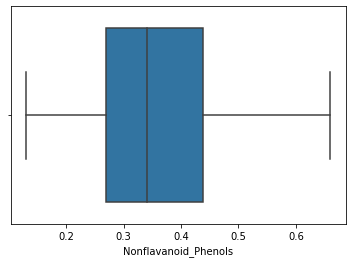

*****************************************************************************************************************************
Feature Proanthocyanins


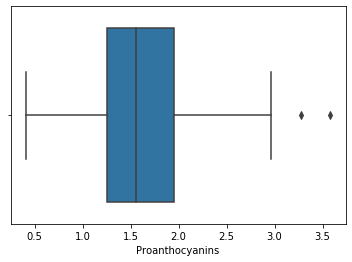

*****************************************************************************************************************************
Feature Color_Intensity


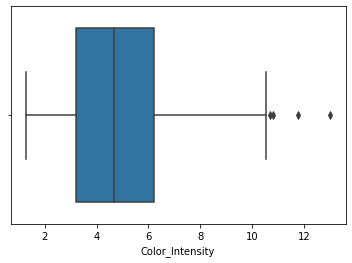

*****************************************************************************************************************************
Feature Hue


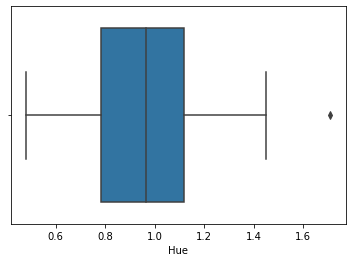

*****************************************************************************************************************************
Feature OD280


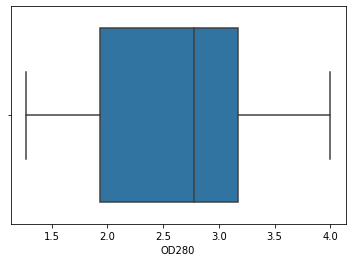

*****************************************************************************************************************************
Feature Proline


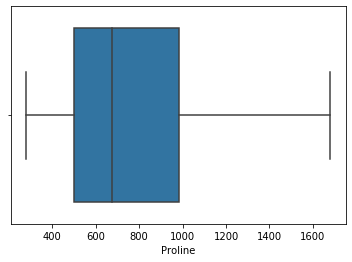

*****************************************************************************************************************************


In [13]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        print('Feature', col)
        sns.boxplot(df[col])
        plt.show()
        print("*"*125)

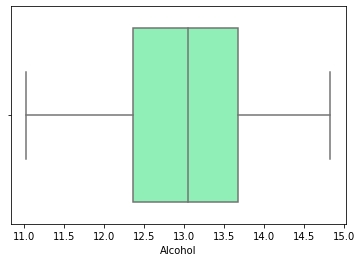

**************************************************************************************************** 




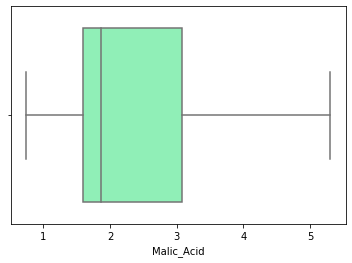

**************************************************************************************************** 




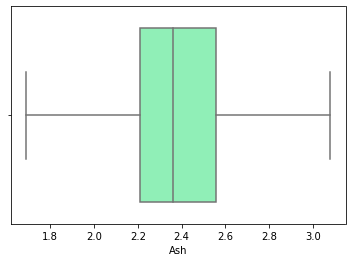

**************************************************************************************************** 




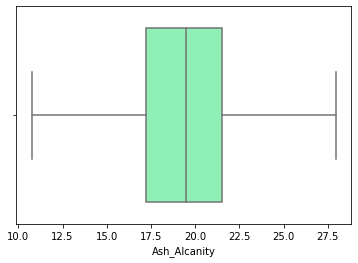

**************************************************************************************************** 




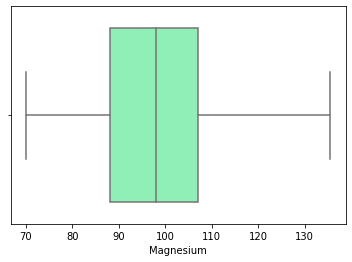

**************************************************************************************************** 




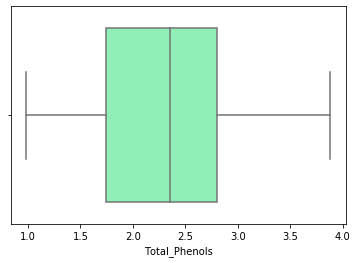

**************************************************************************************************** 




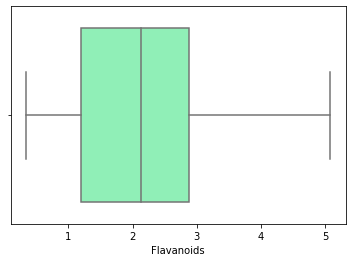

**************************************************************************************************** 




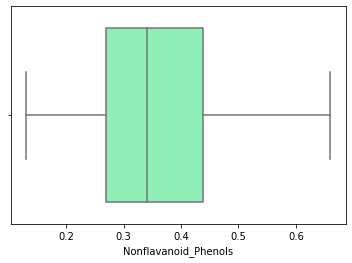

**************************************************************************************************** 




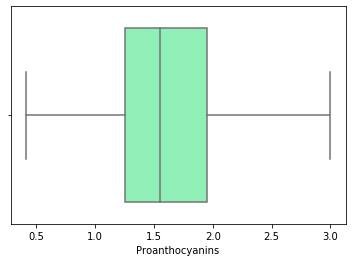

**************************************************************************************************** 




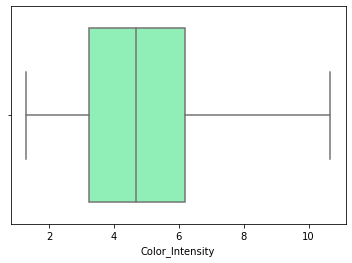

**************************************************************************************************** 




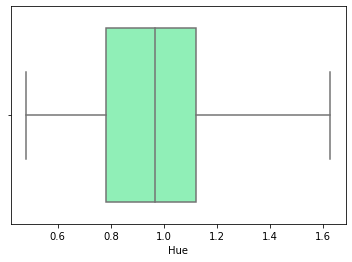

**************************************************************************************************** 




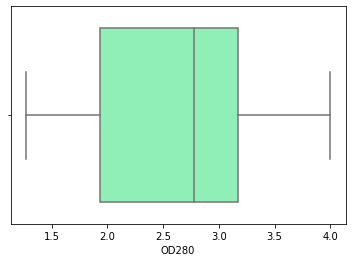

**************************************************************************************************** 




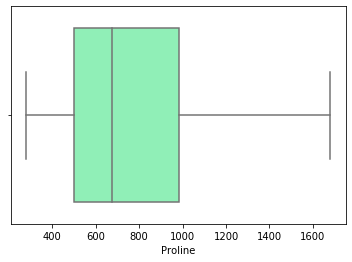

**************************************************************************************************** 




In [14]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

Feature Alcohol


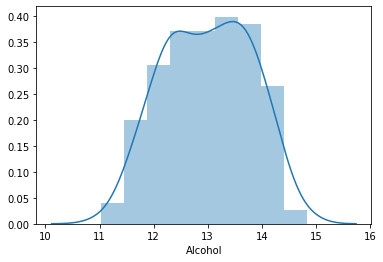

*****************************************************************************************************************************
Feature Malic_Acid


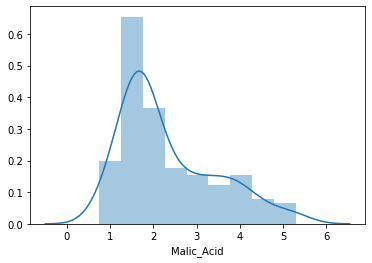

*****************************************************************************************************************************
Feature Ash


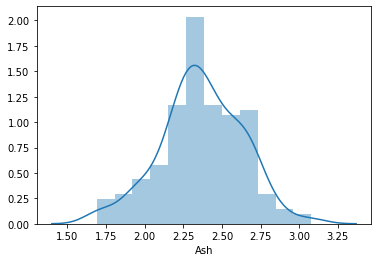

*****************************************************************************************************************************
Feature Ash_Alcanity


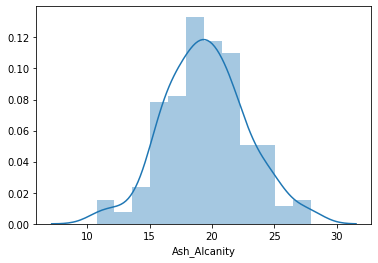

*****************************************************************************************************************************
Feature Magnesium


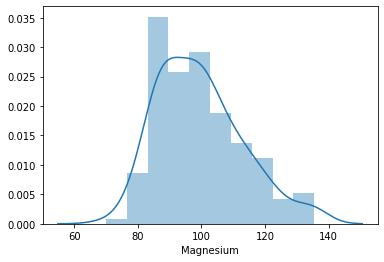

*****************************************************************************************************************************
Feature Total_Phenols


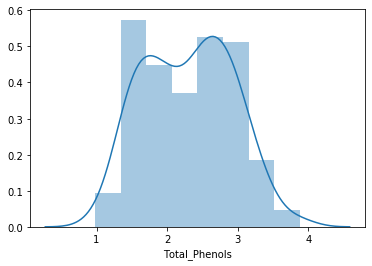

*****************************************************************************************************************************
Feature Flavanoids


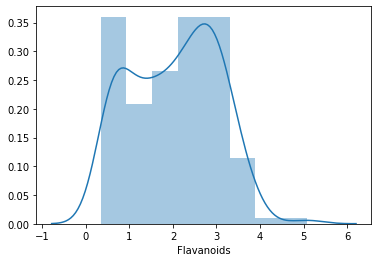

*****************************************************************************************************************************
Feature Nonflavanoid_Phenols


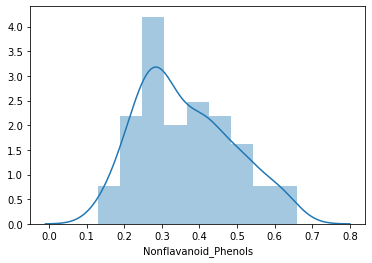

*****************************************************************************************************************************
Feature Proanthocyanins


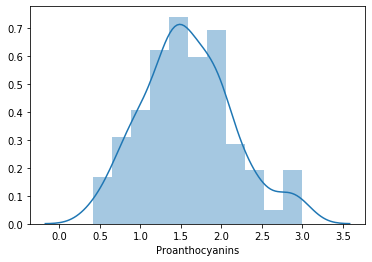

*****************************************************************************************************************************
Feature Color_Intensity


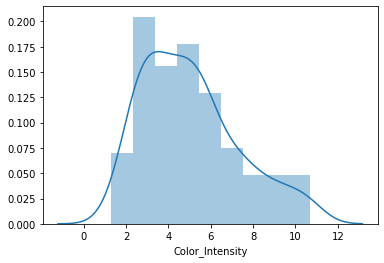

*****************************************************************************************************************************
Feature Hue


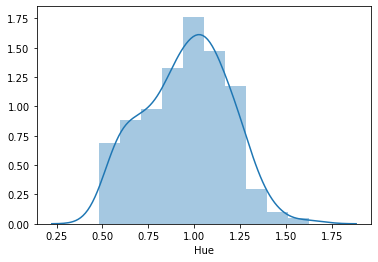

*****************************************************************************************************************************
Feature OD280


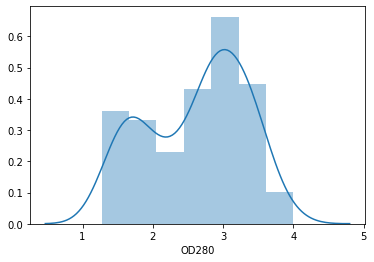

*****************************************************************************************************************************
Feature Proline


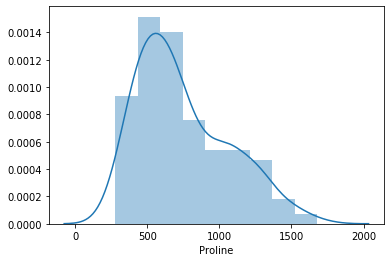

*****************************************************************************************************************************
Feature Customer_Segment


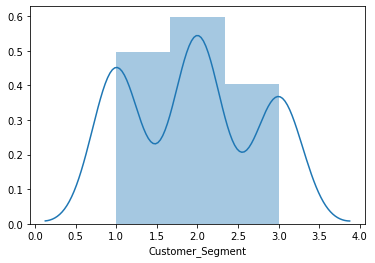

*****************************************************************************************************************************


In [15]:
## checking data distribution after outlier treatment

for col in df.columns:
    if df[col].dtype != object:
        print('Feature', col)
        sns.distplot(df[col])
        plt.show()
        print("*"*125)

In [16]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720,-0.328222
Malic_Acid,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173,0.440422
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676,-0.047680
Ash_Alcanity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700,0.525608
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557,-0.224264
Total_Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385,0.489109
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562,-0.512528
Color_Intensity,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100,0.260260


In [19]:
## Removing variables with correlation below 45

correlation = df.corr()
x = correlation.Customer_Segment[(correlation.Customer_Segment > 0.45) | (correlation.Customer_Segment < -0.45)]
x

Ash_Alcanity            0.525608
Total_Phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid_Phenols    0.489109
Proanthocyanins        -0.512528
Hue                    -0.621549
OD280                  -0.788230
Proline                -0.633717
Customer_Segment        1.000000
Name: Customer_Segment, dtype: float64

In [22]:
x.index

Index(['Ash_Alcanity', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Hue', 'OD280', 'Proline', 'Customer_Segment'],
      dtype='object')

In [23]:
X = df[x.index]
X = X.drop('Customer_Segment', 1)
y = df['Customer_Segment']
X.head()

,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Hue,OD280,Proline
0,15.6,2.80,3.06,0.28,2.29,1.04,3.92,1065
1,11.2,2.65,2.76,0.26,1.28,1.05,3.40,1050
2,18.6,2.80,3.24,0.30,2.81,1.03,3.17,1185
3,16.8,3.85,3.49,0.24,2.18,0.86,3.45,1480
4,21.0,2.80,2.69,0.39,1.82,1.04,2.93,735


## Scaling

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mc = MinMaxScaler()

In [27]:
X = min_max.fit_transform(X)
X[0]

array([0.28197674, 0.62758621, 0.57383966, 0.28301887, 0.72586873,
       0.48854962, 0.97069597, 0.56134094])

In [28]:
## Splitting into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 41)

## Applying PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

In [31]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.52171042, 0.12725051, 0.10488125, 0.08986999])

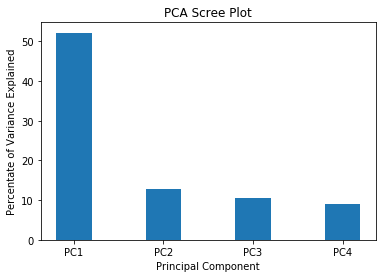

In [32]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)

columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.bar(x= [0,2,4,6], ##DESCRIBES GAPS BETWEEN GRAPHS
        height=percent_variance, tick_label=columns) # x - coordinates on X axis , height - height of the bar
 
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

## Only 74% data is available if we use PCA. Rest of the data is lost in this case